In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import string
import os
from scipy import interpolate
plt.style.use('ggplot')

# Estimate H2S from RGB images

As an initial test, I've manually cropped the stained areas for samples `'a'` to `'k'` from Pernilla's *Fig. 1* and saved them as separate `.tif` files (`'image_a.tif'` to `'image_k.tif')`. I've also cropped one test image from *Fig. 2* (labelled "PV2 kar 36"), which I've named `'image_pv2_kar_36.tif'`.

In [2]:
# User input
# Data folder
img_fold = (r'C:\Data\James_Work\Staff\Pernilla_C\Estimate_H2S\raw_images')

# Calibration concs for samples a to k (see Pernilla's Table 1)
calib_concs = [59, 29, 15, 7.3, 3.7, 1.8, 0.9, 0.5, 0.2, 0.1, 0]

# Test image
test_img = 'pv2_kar_36'

## Plot all images

The code below produces a simple chart showing all 11 calibration images, plus the test image. The code also calculates the average pixel value (over all three bands) for each image for later analysis.

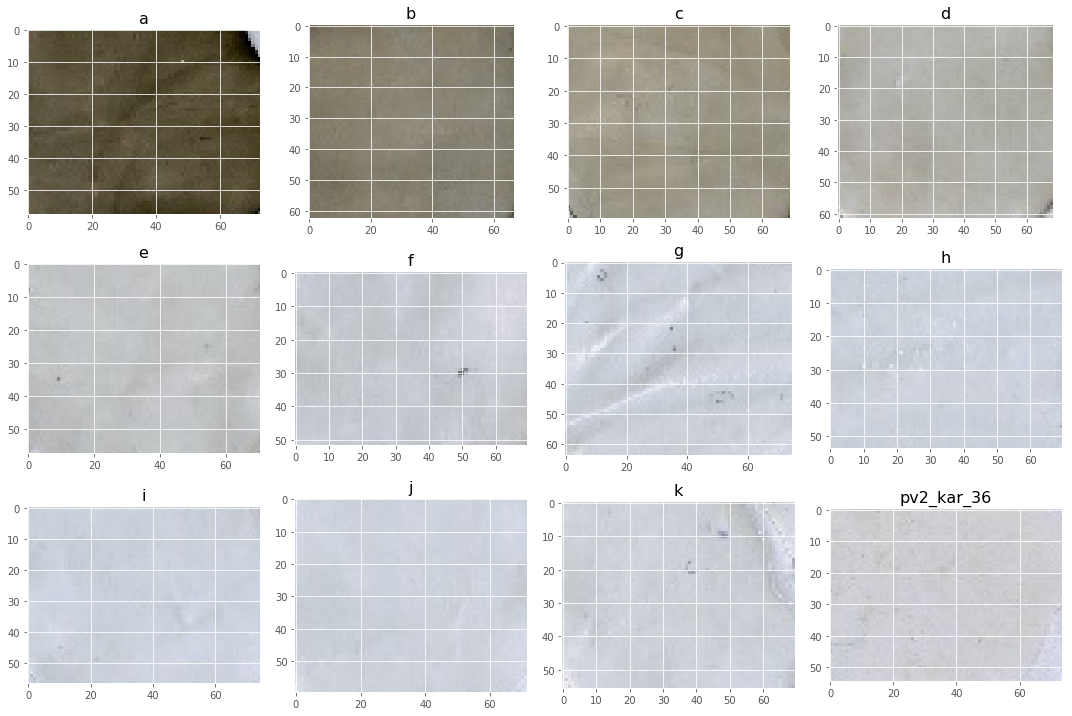

In [3]:
# Letters a to k
letters = list(string.ascii_lowercase)[:11]

# Add test image
letters.append(test_img)

# Containers for image means
img_means = []

# Setup plot
fig, axes = plt.subplots(ncols=4, 
                         nrows=3, 
                         figsize=(15,10))
axes = axes.flatten()

# Loop over images
for idx, letter in enumerate(letters):
    # Read image
    img_path = os.path.join(img_fold, 'image_%s.tif' % letter)
    img=mpimg.imread(img_path)
      
    # Plot
    img_plot = axes[idx].imshow(img)
    axes[idx].set_title(letter, fontsize=16)
    
    if letter != test_img:
        # Get means
        img_means.append(img.mean())

plt.tight_layout()

# Build df from results
df = pd.DataFrame({'calib_conc':calib_concs,
                   'mean':img_means})

## Plot calibration data

In [4]:
# Show pixel averages for each concentration
df

,calib_conc,mean
0,59.0,71.499291
1,29.0,123.334992
2,15.0,146.612238
3,7.3,173.406732
4,3.7,192.946495
5,1.8,201.768498
6,0.9,207.834167
7,0.5,209.796120
8,0.2,210.333723
9,0.1,211.044676


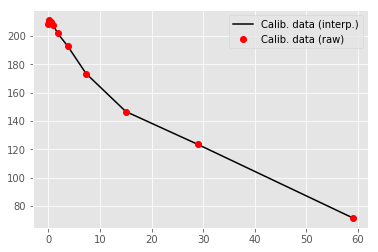

In [5]:
# Plot calibration data
plt.plot(df['calib_conc'], df['mean'], 'k-', label='Calib. data (interp.)')
plt.plot(df['calib_conc'], df['mean'], 'ro', label='Calib. data (raw)')
plt.legend(loc='best')

## Predict

The code below builds a very simple linear interpolator from the calibration data and uses it to predict the H2S concentration for the test image. This is very rough, and it would be better to use a statistical method so that the predictions have quantified uncertainty intervals. This would be an easy extension.

The predicted concentration for the test image is 1.03 umol/l


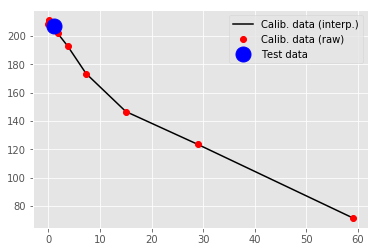

In [6]:
# Build linear interpolator
f = interpolate.interp1d(df['mean'].values,
                         df['calib_conc'].values,
                         kind='linear')

# Read test image
img_path = os.path.join(img_fold, 'image_%s.tif' % test_img)
img=mpimg.imread(img_path)

# Predict concentration
pred = f(img.mean())
print ('The predicted concentration for the test image is %.2f umol/l' % pred)

# Plot
plt.plot(df['calib_conc'], df['mean'], 'k-', label='Calib. data (interp.)')
plt.plot(df['calib_conc'], df['mean'], 'ro', label='Calib. data (raw)')
plt.plot(pred, img.mean(), 'bo', ms=15, label='Test data')
plt.legend(loc='best')